### This script clusters and plotts the expression of top 100 genes from each state among all 3-states cells.
### Plotting is done using sns.clustermap 


In [134]:
import numpy as np
import scanpy as sc
import os
import pandas as pd
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt


In [103]:
# Load h5ad data
bat1k_all_data = sc.read(r"C:\Users\TzachiHNB6\Documents\annotated_count_matrices\bat\blood\bat_mouse_integration\PBMCs_annotated_raw_bat1k\PBMCs_annotated_raw_bat1k.h5ad")
#bat_metadata = pd.read_csv(r"C:\Users\TzachiHNB6\Downloads\pbmcs_bat1k_metadata.csv")
#bat1k_all_data.obs = bat_metadata
bat1k_all_data.obs.rename(columns={"Unnamed: 0": "cell"}, inplace=True)
bat1k_all_data.obs.set_index("cell", inplace=True)

In [106]:
# Keep only CD16 + IFN+ Monocytes in Unstimulated and Poly(I:C)
bat1k_all_data_cd16_ifn_pic = bat1k_all_data[(bat1k_all_data.obs.batch.isin(['Poly(I:C)',"Lipofectamine",'Unstimulated'])) & (bat1k_all_data.obs.inter_species_ann.isin(['Monocytes_CD16', "Monocytes_IFNB1"]))&(bat1k_all_data.obs.Sample!='Bat2')&(bat1k_all_data.obs.pct_counts_MT<10)]

In [ ]:
# Normalize and scale data
sc.pp.normalize_total(bat1k_all_data_cd16_ifn_pic)
sc.pp.log1p(bat1k_all_data_cd16_ifn_pic)
sc.pp.scale(bat1k_all_data_cd16_ifn_pic, max_value=10)


In [107]:
# Add states to data
conditions = [
    (bat1k_all_data_cd16_ifn_pic.obs['inter_species_ann'] == 'Monocytes_IFNB1'),
    (bat1k_all_data_cd16_ifn_pic.obs['inter_species_ann'] == 'Monocytes_CD16') & 
    (bat1k_all_data_cd16_ifn_pic.obs['batch'] == 'Poly(I:C)')]
choices = ['IFN+', 'IFN-']
bat1k_all_data_cd16_ifn_pic.obs['group'] = np.select(conditions, choices, default='Resting')

Trying to set attribute `.obs` of view, copying.
C:\Users\TzachiHNB6\AppData\Local\Programs\Python\Python39\lib\site-packages\anndata\_core\anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [108]:
bat1k_all_data_cd16_ifn_pic.obs

,Unnamed: 0,Sample,batch,n_genes,n_genes_by_counts,total_counts,total_counts_MT,pct_counts_MT,S_score,G2M_score,phase,cell_type,category,leiden,inter_species_ann,inter_species_ann_B,Inflammatory score,group
1681,AAACGCTAGGAAGTCC-1-Bat5-ctrl,Bat5,Unstimulated,2349,2349,7465.0,185.0,2.478232,-0.136861,0.152770,G2M,Monocytes_CD16,Monocytes,9,Monocytes_CD16,Monocytes_CD16 (B),0.337537,Resting
1687,AAATGGAAGCCTTGAT-1-Bat5-ctrl,Bat5,Unstimulated,2779,2779,12184.0,111.0,0.911031,-0.088921,-0.098115,G1,Monocytes_CD16,Monocytes,9,Monocytes_CD16,Monocytes_CD16 (B),0.382378,Resting
1695,AACACACCACAAGTTC-1-Bat5-ctrl,Bat5,Unstimulated,2589,2589,9049.0,66.0,0.729362,-0.199770,0.008664,G2M,Monocytes_CD16,Monocytes,9,Monocytes_CD16,Monocytes_CD16 (B),0.159571,Resting
1702,AACCATGGTACTTGTG-1-Bat5-ctrl,Bat5,Unstimulated,1658,1658,4099.0,46.0,1.122225,-0.056440,0.135978,G2M,Monocytes_CD16,Monocytes,9,Monocytes_CD16,Monocytes_CD16 (B),0.149936,Resting
1704,AACCTGAAGGTGCTAG-1-Bat5-ctrl,Bat5,Unstimulated,365,365,548.0,1.0,0.182482,-0.145999,-0.031725,G1,Monocytes_IFNB1,Monocytes,32,Monocytes_IFNB1,Monocytes_MAFB (B),0.007856,IFN+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59353,TTGTTTGGTATGCGTT-1-Bat8-lipofectamine,Bat8,Lipofectamine,1599,1599,3803.0,58.0,1.525112,0.060106,-0.016515,S,Monocytes_CD16,Monocytes,9,Monocytes_CD16,Monocytes_CD16 (B),0.392567,Resting
59381,TTTATGCCACGACCTG-1-Bat8-lipofectamine,Bat8,Lipofectamine,2351,2350,6354.0,101.0,1.589550,-0.020704,-0.004565,G1,Monocytes_CD16,Monocytes,9,Monocytes_CD16,Monocytes_CD16 (B),0.332480,Resting
59400,TTTCATGCAACACACT-1-Bat8-lipofectamine,Bat8,Lipofectamine,1735,1735,3549.0,178.0,5.015497,0.246354,0.079732,S,Monocytes_CD16,Monocytes,9,Monocytes_CD16,Monocytes_CD16 (B),0.234101,Resting
59421,TTTGACTTCATCACAG-1-Bat8-lipofectamine,Bat8,Lipofectamine,755,755,1260.0,91.0,7.222222,-0.151041,-0.131332,G1,Monocytes_CD16,Monocytes,9,Monocytes_CD16,Monocytes_CD16 (B),0.291002,Resting


In [131]:
# Load top De genes in each state as a list
my_file = open(r"C:\Users\TzachiHNB6\Documents\annotated_count_matrices\bat\blood\bat1k_DE\cd16_mafb_de\bat_no_orthologs_de\bat_top_100_gene_groups_python.txt", "r")
data = my_file.readlines()
data = [gene.replace('\n', "") for gene in data]

In [114]:
# Chose colors for cell gropus
groups = bat1k_all_data_cd16_ifn_pic.obs[["group"]]
lut = dict(zip(groups["group"].unique(), ["#c2c2d6","#bf80ff","#4d94ff"]))
col_colors = groups["group"].map(lut)


In [117]:
# Load gene-state table
gene_groups = pd.read_csv(r"C:\Users\TzachiHNB6\Documents\annotated_count_matrices\bat\blood\bat1k_DE\cd16_mafb_de\bat_no_orthologs_de\gene_groups_map.csv")
gene_groups.set_index("gene", inplace=True)

In [119]:
# Chose colors for gene gropus
lut2 = dict(zip(gene_groups["group"].unique(), ["#c2c2d6","#4d94ff","#bf80ff"]))
row_colors = gene_groups["group"].map(lut2)

Text(806.0000000000001, 0.5, '')

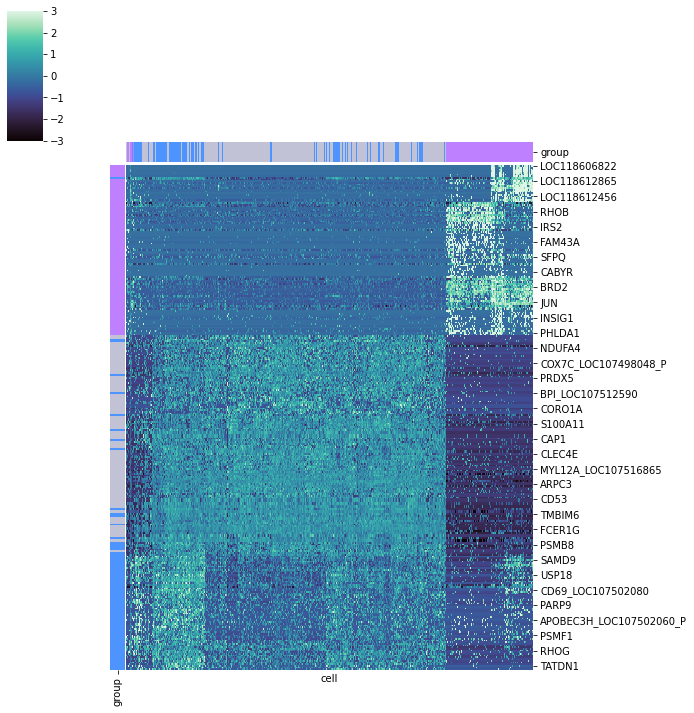

In [124]:
# Plot genes and cells using clustering
# This is a non-deterministic mathod. clustering results may differ based on order of gene passed to method
cg = sns.clustermap(bat1k_all_data_cd16_ifn_pic.to_df()[data].T,cmap = "mako", row_cluster=True,col_cluster=True, method="ward",vmin = -3 , vmax=3, col_colors=col_colors, row_colors=row_colors, xticklabels=False)
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
cg.ax_heatmap.set_ylabel("")


In [135]:
# Save to image
plt.savefig(r"C:\Users\TzachiHNB6\Documents\annotated_count_matrices\bat\blood\bat1k_DE\cd16_mafb_de\bat_no_orthologs_de\heatmap.pdf")




<Figure size 432x288 with 0 Axes>